IMPORT MODULES

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats as stats
from scipy.stats import norm
import random
import pandas as pd
import math

CONSTANTS

In [133]:
global H_0, m_0, c
m_0 = -20.45
c = 299792458 # m/s
H_0 = 70*10**-3 #m s^-1 pc^-1

READ DATA

In [134]:
#reads data and saves it into relevantly named variables.
data = functions.read_data('sn_data_extended.txt')
name, redshift, distance_modulus, dm_err, low_mass_prob = data[0], data[1], data[2], data[3], data[4]

Text(0, 0.5, 'Distance modulus $m - M$')

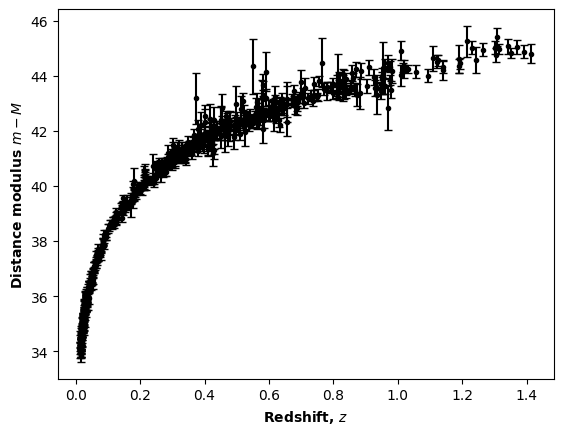

In [135]:
plt.errorbar(redshift, distance_modulus, yerr = dm_err, linestyle = 'None', marker='o', color = 'black', capsize = 3, markersize = 3)
plt.xlabel('Redshift, $z$', weight = 'bold')
plt.ylabel('Distance modulus $m - M$', weight = 'bold')

Calculate cosmological constant density parameter for FLAT universe

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0]))-5

initial = np.array([0.5]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) #optimised parameters given in erg/s/Ang
#prints the total density parameter to check how close it is to 1 (flat universe).
print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0]), np.sqrt(np.sum(parameters[1]**2))))

In [ ]:
def jackknifing(xval, yval, yerr, model_funct, initial):
    runs = []
    print(xval.dtype)
    for j in range(0, len(xval)):
        print(j)
        xs = np.concatenate((xval[0:j], xval[j+1:len(xval)]))
        ys = np.concatenate((yval[0:j], yval[j+1:len(yval)]))
        yerrs = np.concatenate((yerr[0:j],yerr[j+1:len(yerr)]))
        parameters = functions.automated_curve_fitting(xs, ys, yerrs, model_funct, initial,
                                                    plot = False) #optimised parameters given in erg/s/Ang
        runs.append(parameters[0])
    return np.std(runs, axis = 0)

errors = jackknifing(xval, yval, yerr, model_funct, initial)
print(errors)

For the probability that the supernova was hosted by a low-mass galaxy

In [ ]:
low_mass = np.where(low_mass_prob > 0.5)
high_mass = np.where(low_mass_prob <= 0.5)
plt.scatter(redshift[low_mass], distance_modulus[low_mass], color = 'red', alpha = 0.5)
plt.scatter(redshift[high_mass], distance_modulus[high_mass], color = 'green', alpha = 0.5)

#chi squared fitting - low mass

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift[low_mass]
yval = distance_modulus[low_mass]
yerr = dm_err[low_mass]

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], vals[1]))-5

initial = np.array([0.73, 0.27]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) #optimised parameters given in erg/s/Ang
#prints the total density parameter to check how close it is to 1 (flat universe).
print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0]), np.sqrt(np.sum(parameters[1]**2))))

#chi squared fitting - high mass.

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift[high_mass]
yval = distance_modulus[high_mass]
yerr = dm_err[high_mass]

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) #optimised parameters given in erg/s/Ang
#prints the total density parameter to check how close it is to 1 (flat universe).
print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0]), np.sqrt(np.sum(parameters[1]**2))))

Calculate Density Parameters with no restriction on Universe geometry - automated chi-squared fitting

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], vals[1]))-5

initial = np.array([0.73, 0.27]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=True,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) #optimised parameters given in erg/s/Ang
#prints the total density parameter to check how close it is to 1 (flat universe).
print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0]), np.sqrt(np.sum(parameters[1]**2))))

3 parameter fitting

In [ ]:
#chi squared fitting

"""xval = redshift
yval = distance_modulus
yerr = dm_err

plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

def model_funct(xs, *vals):
    try:
        if k==0:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[1], k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]
        else:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[2], k, vals[0], vals[1]))[0]) for x in xs.tolist()]
    except:
        if k==0:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[1], k, vals[0], 1-vals[0]))[0])
        else:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[2], k, vals[0], vals[1]))[0])

    if k == 0:
        return 5*np.log10((1+xs)*r_c)-5
    elif k == 1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c)/R_0))-5
    elif k == -1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sinh(np.array(r_c)/R_0))-5

initials = [np.array([0.02, 0.3, 0.075]), np.array([0.05, 0.075]), np.array([1.5, 0.51, 0.075])] # Initial guess for fit parameters
ks = [-1, 0, 1]

for i in range(0, len(ks)):
    k = ks[i]
    print(f'k={k}') 
    initial = initials[i]
    parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$') #optimised parameters given in erg/s/Ang
    if k == 1 or k==-1:
        print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0][0:2]), np.sqrt(np.sum(parameters[1][0:2]**2))))"""

Different dark energy models

First fitting w (as a constant) and $\Omega_{\Lambda, 0}$

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model=vals[1]))-5

initial = np.array([0.73, -1]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=True,
                                                parameter_labels=['$Ω_{Λ,0}$', '$w_0$']) 

Asymptotic model: $w(z) = w_0 + w_a\frac{z}{1+z}$

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err
history = []

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    history.append(vals)
    penalisation = 0
    try:
        if vals[0]>1:
            penalisation = 10000
    except:
        for z in xs.tolist():
            if vals[0]>1:
                penalisation = 10000

    """try:
        if vals[2]+vals[1]*xs/(1+xs) > -1/3:
            penalisation = 10000*(vals[2]+vals[1]*xs/(1+xs) - -1/3)
    except:
        for z in xs.tolist():
            if vals[2]+vals[1]*z/(1+z) > -1/3:
                penalisation = 10000*(vals[2]+vals[1]*z/(1+z) - -1/3)
                
    try:
        if math.isnan((c)/(H_0**2*((1-vals[0])*(1+xs)**3+vals[0]*(1/(1+xs))**(-3*(1+vals[2]+vals[1]))*np.exp(-3*vals[1]*xs/(1+xs))))**0.5) == True:
            return 10000*abs(H_0**2*((1-vals[0])*(1+z)**3+vals[0]*(1/(1+z))**(-3*(1+vals[2]+vals[1]))*np.exp(-3*vals[1]*z/(1+z))))
    except:
        for z in xs.tolist():
            if math.isnan((c)/(H_0**2*((1-vals[0])*(1+z)**3+vals[0]*(1/(1+z))**(-3*(1+vals[2]+vals[1]))*np.exp(-3*vals[1]*z/(1+z))))**0.5) == True:
                return 10000*abs(H_0**2*((1-vals[0])*(1+z)**3+vals[0]*(1/(1+z))**(-3*(1+vals[2]+vals[1]))*np.exp(-3*vals[1]*z/(1+z))))"""
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='asymptotic', w_0 = vals[2], w_a = vals[1]))-5 + penalisation

initial = np.array([0.4, 0, -1.3]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

"""errors = jackknifing(xval, yval, yerr, model_funct, initial)
print(errors)"""

In [ ]:
plt.plot(history[0:60])

In [ ]:
covariance_matrix = np.array([[0.08393002, 0.87103461, 0.08421353],
 [0.87103461, 9.50116613, 0.81925233],
 [0.08421353, 0.81925233, 0.09189171]])

# Compute correlation coefficient matrix
diagonal_elements = np.sqrt(np.diag(covariance_matrix))
correlation_matrix = covariance_matrix / np.outer(diagonal_elements, diagonal_elements)

print("Correlation coefficient matrix:")
print(correlation_matrix)

Fitting all 4 parameters at once $(\Omega_{\Lambda,0}, \Omega_{M, 0}, w_0, w_a)$ for the asymptotic w model

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], vals[1], w_model='asymptotic', w_0 = vals[2], w_a = vals[3]))-5

initial = np.array([0.7, 0.3, -1, 0]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False) 

In [ ]:
print((np.zeros(len(initial))-np.inf, np.zeros(len(initial))+np.inf).shape)
print(np.array([1,1,1,1]).shape)

$w(z) = w_0 + w_{z}z$

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='linear', w_0 = vals[1], w_a = vals[2]))-5

initial = np.array([0.73, -1, 0]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

$w(z) = w_0 + w_a\ln(1+z)$ - Logarithmic model

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='logarithmic', w_0 = vals[1], w_a = vals[2]))-5

initial = np.array([0.73, -1, 0]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

$w(z) = w_0 + w_a \frac{z}{(1+z)^2}$ - p = 2 model

In [ ]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='p=2', w_0 = vals[1], w_a = vals[2]))-5

initial = np.array([0.73, -1, 0]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

Plotting all models on same graph

In [ ]:
#the model function we are fitting the data to.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='logarithmic', w_0 = -1, w_a = vals[1]))-5

#top plot - plotting observed data with three lines corresponding to the three different combinations of the density parameters in the model function.
plt.figure(1)
plt.figure(1).add_axes((0,0,0.8,0.8))
plt.errorbar(redshift, distance_modulus, yerr = dm_err, color = 'black', capsize = 3, marker='o', linestyle='None')
plt.plot(np.linspace(np.min(redshift), np.max(redshift), 1000), model_funct(np.linspace(np.min(redshift), np.max(redshift), 1000), L_peak, H_0, m_0, omega_lambda, 1-omega_lambda), label = f'$Ω_Λ = {np.round(omega_lambda, 2)}, Ω_M = {np.round(1-omega_lambda, 2)}$', color = 'red', linestyle = '--')
plt.plot(np.linspace(np.min(redshift), np.max(redshift), 1000), functions.mag_model(np.linspace(np.min(redshift), np.max(redshift), 1000), L_peak, H_0, m_0, 1, 0), label = '$Ω_Λ = 1, Ω_M = 0$', color = 'blue', linestyle = '--')
plt.plot(np.linspace(np.min(redshift), np.max(redshift), 1000), functions.mag_model(np.linspace(np.min(redshift), np.max(redshift), 1000), L_peak, H_0, m_0, 0, 1), label = '$Ω_Λ = 0, Ω_M = 1$', color = 'green', linestyle = '--')
plt.ylabel('Effective Peak Magnitude, $m_{eff}$', weight = 'bold', fontsize = 12)
plt.legend()
plt.title('All data')

#bottom left plot - plotting residuals for three different model functions.
plt.figure(1).add_axes((0,-0.25,0.8,0.25))
colours = ['blue', 'green', 'red']
omega_lambdas = [1, 0, omega_lambda]
plt.ylabel("""Normalised
Residuals""", weight = 'bold')
plt.ylim(-3, 3)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y = 1, linestyle = ':', color = 'dimgrey'); plt.axhline(y = -1, linestyle = ':', color = 'dimgrey')
plt.axhline(y = 2, linestyle = ':', color = 'lightgrey'); plt.axhline(y = -2, linestyle = ':', color = 'lightgrey')
plt.xlabel('Redshift, $z$', weight = 'bold', fontsize = 12)
for i in range(0, len(colours)):
        norm_residuals = functions.get_norm_residuals([omega_lambdas[i]], model_funct, redshift, eff_peak_mag, mag_err)
        plt.scatter(redshift, norm_residuals, color=colours[i], marker = 'd')

#bottom right plot - plotting normalised residual distribution histogram for each of the three cases, with a Gaussian centred on 0 superimposed on top.
plt.figure(1).add_axes((0.8,-0.25,0.15,0.25))
plt.xticks([0.2,0.4], fontsize = 13)
mu = 0; variance = 1
sigma = math.sqrt(variance)    
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(stats.norm.pdf(y, mu, sigma), y, color = 'black')
plt.xlabel("""Probability
Density""", fontsize = 14, weight = 'bold')
plt.gca().set_yticks([])
plt.gca().invert_yaxis()
for i in range(0, len(colours)):
        norm_residuals = functions.get_norm_residuals([omega_lambdas[i]], model_funct, redshift, eff_peak_mag, mag_err)
        plt.hist(norm_residuals, bins=np.arange(-10, 10, 0.5), alpha = [0.5, 0.5, 0.9][i], density = True, orientation = 'horizontal', color = colours[i])
plt.ylim(-3, 3)

Different dataset

In [ ]:
#ascii python reader for table
alldata = np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 26)
redshifts = float(np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 3, max_rows=1)[1])
time = alldata[:, 0]
flux = alldata[:, 1]
plt.scatter(time, flux)
print(redshifts)

*_Markov-Chain Monte-Carlo_* - Random Walker

In [ ]:
#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

initial_pos = [0, 0]
w = functions.walker(initial_pos, ndim = 2, step_size=0.01)
no_steps = 100

pos_test = w.doSteps(10000)
print(pos_test)
# plots to help debugging
plt.plot(pos_test[:, 0], pos_test[:, 1], alpha = 0.7, color = 'red')
plt.legend()
plt.ylabel('yval')
plt.xlabel('xval')
plt.show()

"""for i in range(0, 10000):
    if (i+1) % 5 == 0:
        plt.figure()
        plt.plot(pos_test[0:i+1, 0], pos_test[0:i+1, 1], alpha = 0.7, color = 'red')
        plt.xlim(pos_test[:, 0].min()-0.05, pos_test[:, 0].max()+0.05)
        plt.ylim(pos_test[:, 1].min()-0.05, pos_test[:, 1].max()+0.05)
        plt.xlabel('xval')
        plt.ylabel('yval')
        plt.savefig(f'RW_images/{i}.png', bbox_inches='tight')
        plt.close()"""

Trial data

In [ ]:
#test function
def func(x, a, b):
    return a*x+b

#trial data
np.random.seed(123)
xdata = np.arange(0, 51, 1).astype('float64')
ydata = (np.arange(0, 101, 2)+np.random.randint(20, size = 51)*0.01).astype('float64')
yerr = ydata*0.0005
print(xdata, ydata, yerr)

#a = 2,  b = 0

In [ ]:
initial_pos = np.array([1, 1])
no_steps = 10000

functions.MCMC(xdata, ydata, yerr, func, initial_pos, no_steps = no_steps, burn_in_step_size=0.01)

REAL DATA

In [ ]:
#defining x and y values and the y errors for the simulation.
xval = redshift
yval = distance_modulus
yerr = dm_err

#the model function that we're fitting to the dataset.
def model_funct(xs, omega_lambda0, omega_M0):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, omega_lambda0, omega_M0))-5

#starting position of MCMC chain
initial_pos = np.array([0.5, 0.5])

#runs MCMC
parameters = []
for i in range(0, 10):
    parameters.append(functions.MCMC(xval, yval, yerr, model_funct, initial_pos, no_steps=700, burn_in_step_size=0.01, post_burn_in_step_size=0.005, burn_in=300))
print(parameters)

#calculating the mean and standard deviation of the two parameters
a = np.array(parameters)[:, 0]
b = np.array(parameters)[:, 1]
print(np.mean(a), np.std(a))
print(np.mean(b), np.std(b))

In [ ]:
print(a)
print(b)

#writes data to csv file with comma delimiter and no index numbers.
df = pd.DataFrame({'omega_lambda0': a,
                  'omega_M0': b})
print(df)
df.to_csv('simulation_data/run_7', sep=',', index = False)

In [ ]:
print(np.sum(functions.chisq([0.5, 0.5], model_funct, xval, yval, yerr)))
print(np.sum(functions.chisq([0.5001, 0.5000], model_funct, xval, yval, yerr)))

In [ ]:
print(np.exp(-10*(783.355870229238-783.2563878419572)))

Fitting w models with MCMC

In [ ]:
%%time
#defining x and y values and the y errors for the simulation.
xval = redshift
yval = distance_modulus
yerr = dm_err

#the model function that we're fitting to the dataset.
def model_funct(xs, omega_lambda0, w_a, w_0):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, omega_lambda0, 1-omega_lambda0, w_model = 'asymptotic', w_0 = w_0, w_a = w_a))-5

#starting position of MCMC chain
initial_pos = np.array([0.5, 0.5, -0.5])

#runs MCMC
parameters = []
for i in range(0, 50):
    print(i)
    parameters.append(functions.MCMC(xval, yval, yerr, model_funct, initial_pos, no_steps=3000, burn_in_step_size=0.01, post_burn_in_step_size=0.005, burn_in=2500, parameter_labels=['$Ω_{Λ,0}$', '$w_0$', '$w_a$'], dimensions=3))
print(parameters)

#calculating the mean and standard deviation of the two parameters
a = np.array(parameters)[:, 0]
b = np.array(parameters)[:, 1]
print(np.mean(a), np.std(a))
print(np.mean(b), np.std(b))
c = np.array(parameters)[:, 2]
print(np.mean(c), np.std(c))

#writes data to csv file with comma delimiter and no index numbers.
df = pd.DataFrame({'omega_lambda0': a,
                  'w_a': b,
                  'w_0': c})
print(df)
df.to_csv('simulation_data/asymptotic_50iter_3', sep=',', index = False)

Plotting histogram of results from 1000 iteration run

In [ ]:
df = pd.read_csv('simulation_data/run_6')
omega_lambda0 = df['omega_lambda0']
omega_M0 = df['omega_M0']
plt.hist(omega_lambda0, bins=np.linspace(omega_lambda0.min(), omega_lambda0.max(), 50), density=True)
mu, std = norm.fit(omega_lambda0)
xmin, xmax = 0, 1
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color = 'darkblue', label = '$Ω_{Λ,0}$')

plt.hist(omega_M0, bins=np.linspace(omega_M0.min(), omega_M0.max(), 50), density=True)
mu, std = norm.fit(omega_M0)
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color = 'red', label = '$Ω_{M,0}$')

plt.xlabel('Density parameters')
plt.legend()

PRE EXISTING LIBRARY

In [ ]:
import pymc as pm
plt.rc('font', size=12)

In [ ]:
# 2. model that data with a simple regression model
with pm.Model() as exercise2:

    stdev = pm.HalfNormal('stdev', sigma = .05)
    omega_lambda0 = pm.Normal('omega_lambda0', mu = 0.5, sigma=0.5)
    omega_M0 = pm.Normal('omega_M0', mu = 0.5, sigma=0.5)
    expected_value = 5*np.log10((1+redshift)*functions.get_transverse_comoving_distance(redshift, H_0, omega_lambda0, omega_M0))-5
    y = pm.Normal('y', mu=expected_value, sd=stdev, observed=distance_modulus)

with exercise2:
    trace = pm.sample(300, tune=300)

pm.traceplot(trace, ['omega_lambda0', 'omega_M0', 'stdev'])

In [ ]:
map_estimate = pm.find_MAP(model=exercise2)
map_estimate

In [ ]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

# 1. generate the artificial dataset.
N = 10000

noise = np.random.normal(0.0, 0.1, N)
X = np.random.normal(1.0, 0.1, N)
obs_y = (0.65 * X) + 0.5 + noise

# 2. model that data with a simple regression model
with pm.Model() as exercise2:

    stdev = pm.HalfNormal('stdev', sd=1.)
    intercept = pm.Normal('intercept', mu=0.0, sd=1.)
    coeff = pm.Normal('beta', mu=0.5, sd=1.)

    expected_value = (X * coeff) + intercept
    y = pm.Normal('y', mu=expected_value, sd=stdev, observed=obs_y)

with exercise2:
    trace = pm.sample(10, tune=10, step=pm.Metropolis())

pm.traceplot(trace, ['intercept', 'beta', 'stdev'])



In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")


import pymc3 as pm

print(f"Running on PyMC3 v{pm.__version__}")

basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

map_estimate = pm.find_MAP(model=basic_model)
map_estimate

In [ ]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500, return_inferencedata=False)

with basic_model:
    az.plot_trace(trace)

In [71]:
import emcee
from tqdm import tqdm

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

def log_likelihood(theta, x, y, yerr):
    omega_lambda0, w_0, w_a = theta
    model = 5*np.log10((1+x)*functions.get_transverse_comoving_distance(x, H_0, omega_lambda0, 1-omega_lambda0, w_model = 'asymptotic', w_0 = w_0, w_a = w_a))-5
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2)

def log_prior(theta):
    omega_lambda0, w_0, w_a = theta
    if 0 < omega_lambda0 < 1 and -5 < w_0 < 5 and -10 < w_a < 10:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

"""from scipy.optimize import minimize
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.7, 0.3, np.log(0.5)])
soln = minimize(nll, initial, args=(xval, yval, yerr))
m_ml, b_ml, log_f_ml = soln.x"""

pos = np.array([0.7, -1, 0]) + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(xval, yval, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [1:58:12<00:00,  1.42s/it]  


State([[ 0.66121949 -0.8655445  -2.30795841]
 [ 0.55514442 -1.00263796 -6.90069922]
 [ 0.6679812  -0.93427218 -1.88262165]
 [ 0.64146718 -1.15319523 -0.40711282]
 [ 0.65097191 -0.88638499 -2.50037334]
 [ 0.605904   -1.28971336 -0.09773202]
 [ 0.79172573 -0.96161023  0.79297568]
 [ 0.68731638 -0.92038806 -1.17117671]
 [ 0.59954201 -1.1464807  -1.68543877]
 [ 0.56486248 -1.1006252  -3.66806404]
 [ 0.67283031 -0.98483503 -1.47699797]
 [ 0.58805327 -1.12859785 -4.64962779]
 [ 0.54681331 -1.2650254  -4.13051098]
 [ 0.59385276 -1.1309666  -2.47470844]
 [ 0.68675712 -1.01272023 -1.23532677]
 [ 0.62362668 -0.91948654 -3.68919202]
 [ 0.64943064 -0.95878152 -2.20594158]
 [ 0.66952725 -0.94449276 -1.34301885]
 [ 0.66221883 -1.02181261 -0.93553759]
 [ 0.6025395  -1.10440334 -2.50695102]
 [ 0.63874308 -1.09773844 -0.85598785]
 [ 0.64935048 -1.06455807 -1.28975351]
 [ 0.78577938 -0.91677832  0.54714869]
 [ 0.6442419  -1.1002355  -0.82430595]
 [ 0.58732915 -0.78697506 -6.31880034]
 [ 0.67180608 -0.90

Text(0.5, 0, 'step number')

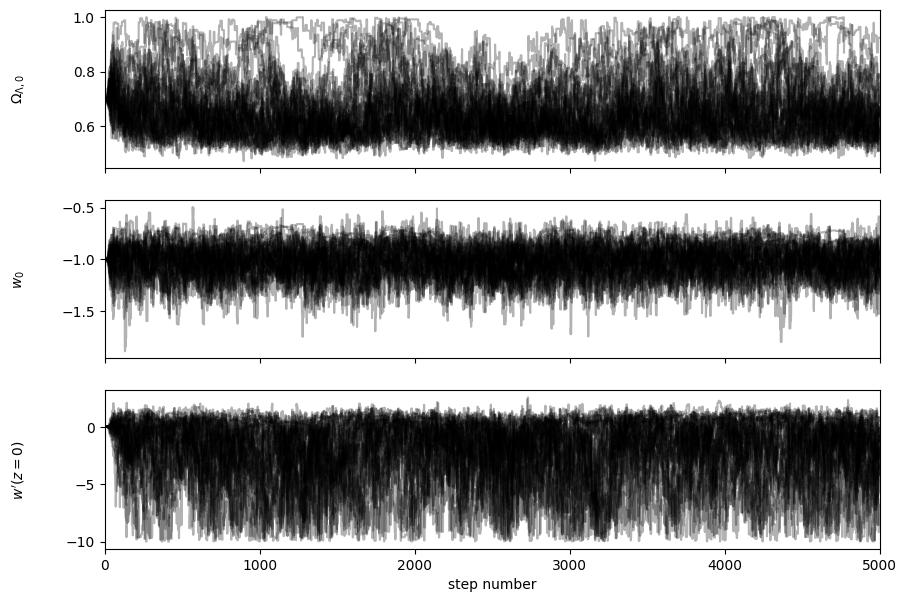

In [72]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ['$Ω_{Λ,0}$', '$w_0$', "$w'(z=0)$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [112]:
flat_samples = sampler.get_chain(discard=100, flat=True)
print(flat_samples.shape)

(156800, 3)


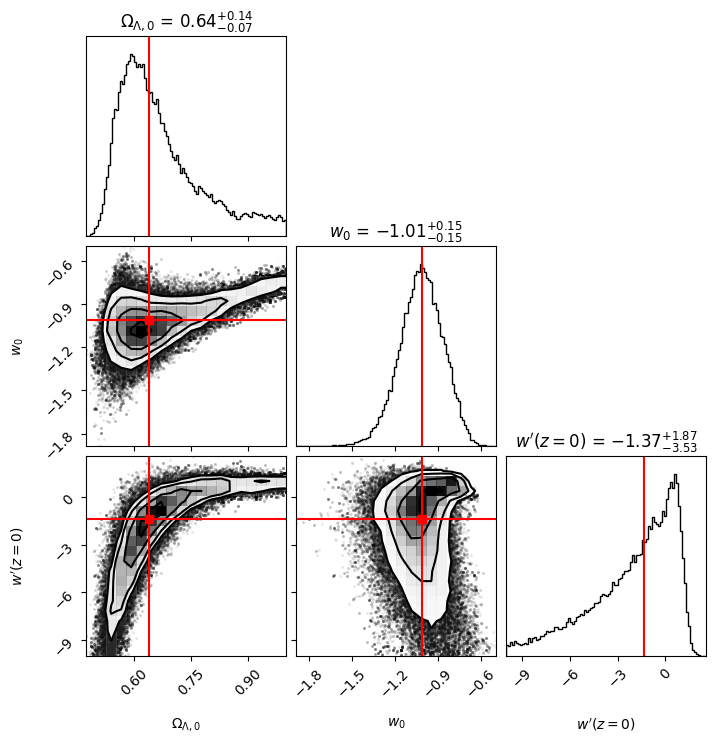

In [131]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[np.percentile(flat_samples[:, 0], [16, 50, 84])[1], np.percentile(flat_samples[:, 1], [16, 50, 84])[1], np.percentile(flat_samples[:, 2], [16, 50, 84])[1]],
truth_color = 'red', hist_bin_factor = 5, show_titles = True, title_fmt='.2f')

In [109]:
from IPython.display import display, Math
flat_samples = sampler.get_chain(flat=True)
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "{3} = "+"${{{0:.3f}}}_{{-{1:.3f}}}^{{{2:.3f}}}$"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>